In [1]:
import pandas as pd
import numpy as np
import modules.analysis as analysis
import modules.utils as utils

# TS decomposition analysis
## Create metric CSV

In [4]:
df = analysis.eval_metrics('2022110413591449', out_path='analysis/benchmark/', min_months=24)

## Plot benchmark charts

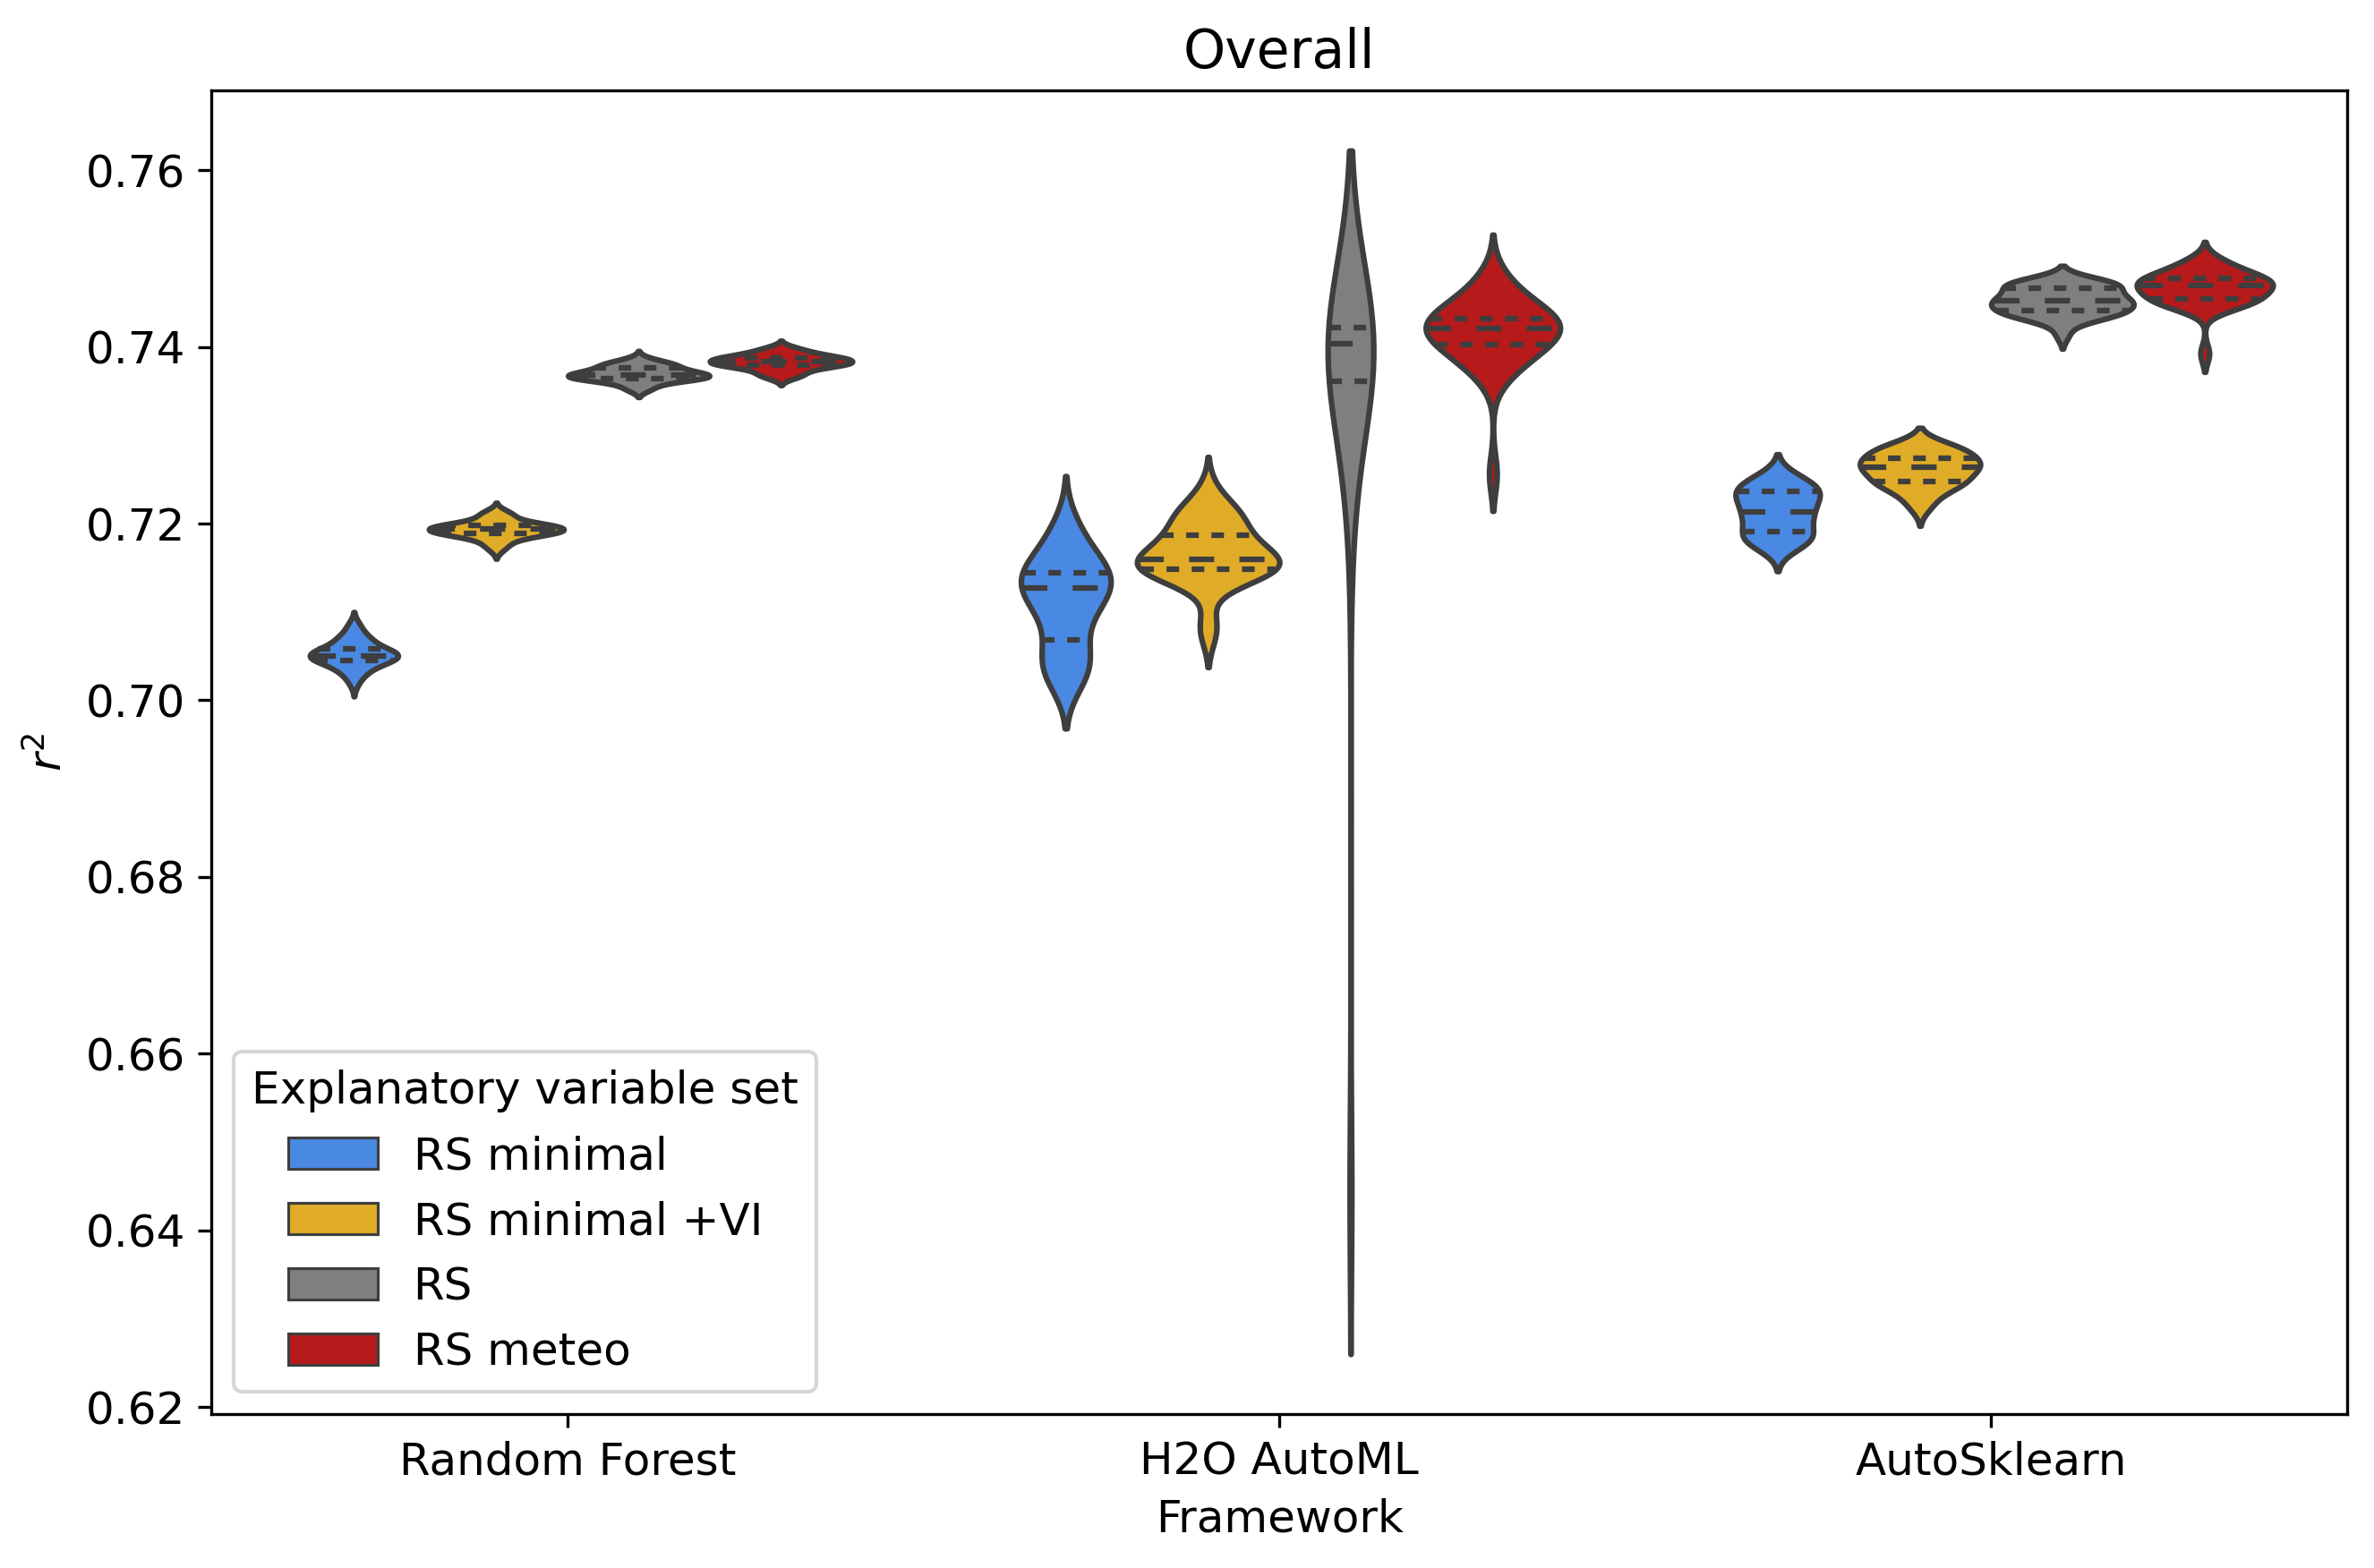

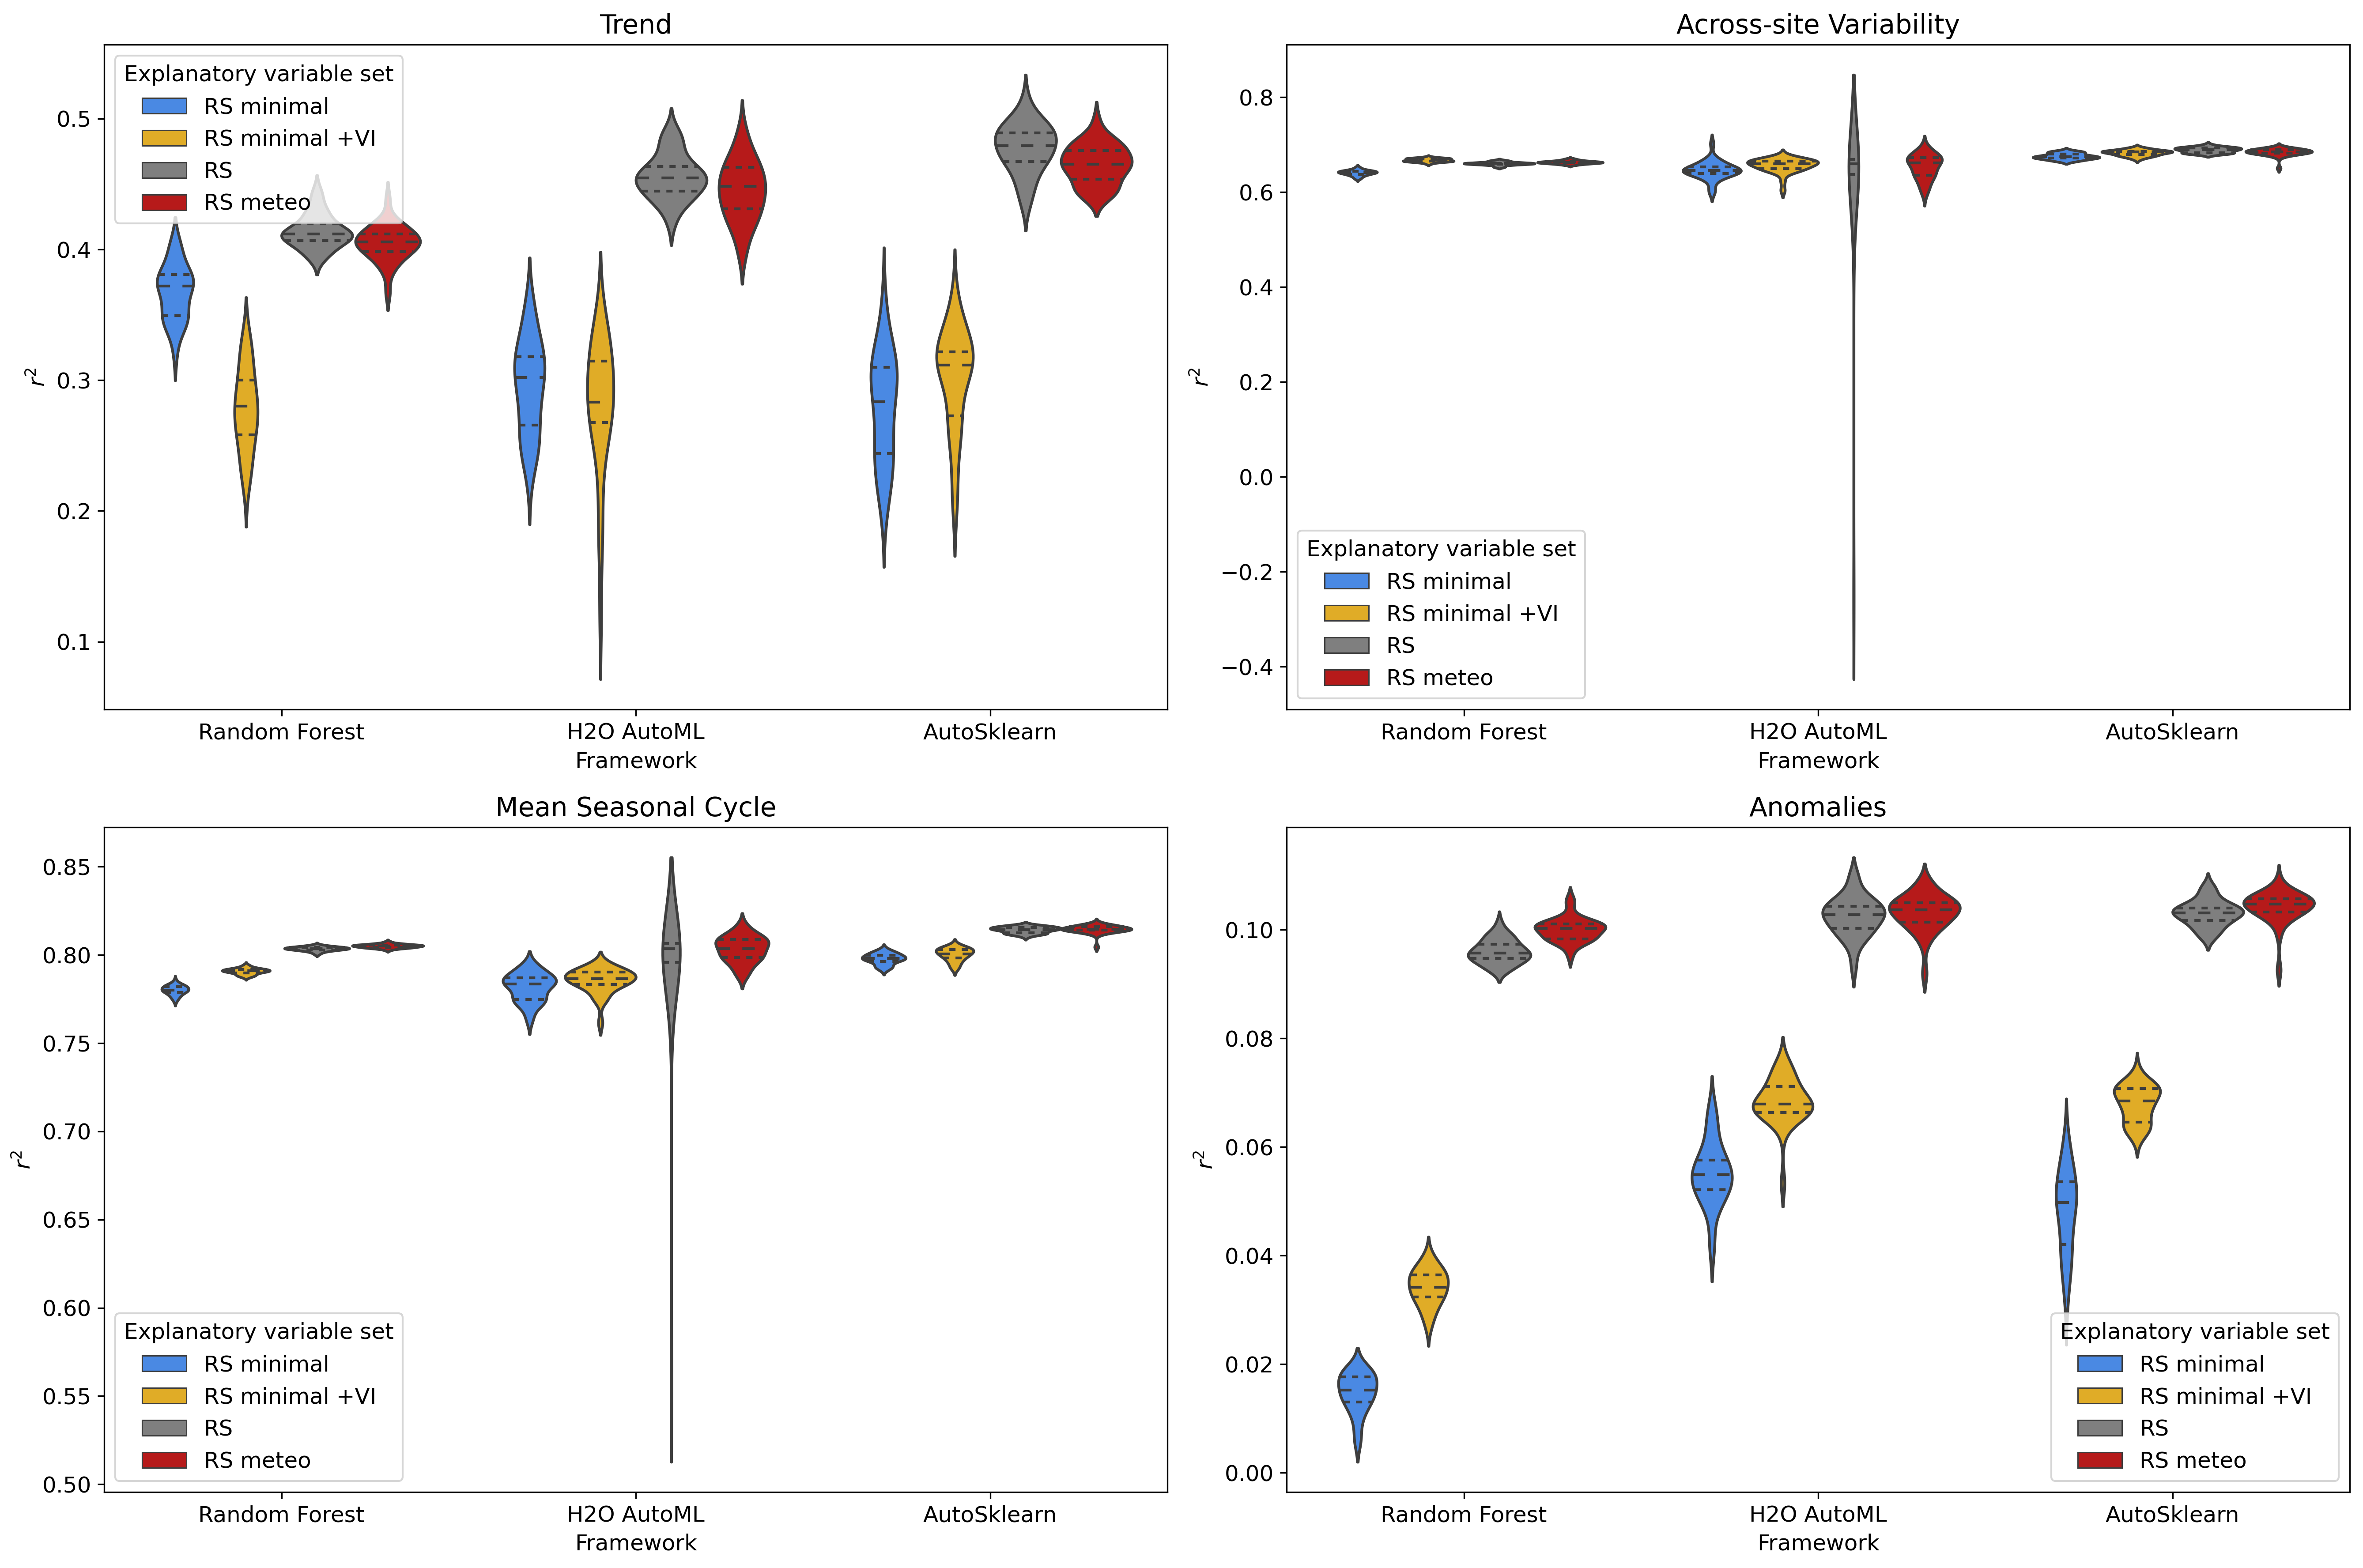

In [8]:
exp_ids = [2022102313544246, 2022102313544325, 2022110413591325, 2022110213583060, 2022110213583128, 2022110413591387, 2022102513552709, 2022102513552801, 2022110313584614, 2022103113574994, 2022103113574896, 2022110413591449]
var_sets = ['RS minimal', 'RS minimal', 'RS minimal', 'RS minimal +VI', 'RS minimal +VI', 'RS minimal +VI', 'RS', 'RS', 'RS', 'RS meteo', 'RS meteo', 'RS meteo']
frameworks = ['Random Forest', 'H2O AutoML', 'AutoSklearn', 'Random Forest', 'H2O AutoML', 'AutoSklearn', 'Random Forest', 'H2O AutoML', 'AutoSklearn', 'Random Forest', 'H2O AutoML', 'AutoSklearn']

frames =[]
for idx, exp_id in enumerate(exp_ids):
    df = pd.read_csv('analysis/benchmark/' + str(exp_id) + '/metrics.csv')
    df['Explanatory variable set'] = var_sets[idx]
    df['Framework'] = frameworks[idx]
    frames.append(df)
    
df = pd.concat(frames)
analysis.plt_model_comparison(df, 'analysis/benchmark/', 'Explanatory variable set', 'Framework', 'r2_overall')

In [9]:
# Metrics
df.groupby(['Framework', 'Explanatory variable set']).mean()

/tmp/ipykernel_160/3503398917.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Framework', 'Explanatory variable set']).mean()


r2_overall  r2_trend  r2_anomalies  \
Framework     Explanatory variable set                                       
AutoSklearn   RS                          0.745202  0.477413      0.103077   
              RS meteo                    0.746581  0.464917      0.104210   
              RS minimal                  0.721410  0.278891      0.048244   
              RS minimal +VI              0.726082  0.301064      0.068003   
H2O AutoML    RS                          0.735369  0.455500      0.102501   
              RS meteo                    0.741576  0.444822      0.103198   
              RS minimal                  0.711214  0.295208      0.055044   
              RS minimal +VI              0.716639  0.280111      0.068353   
Random Forest RS                          0.736942  0.413648      0.096008   
              RS meteo                    0.738279  0.404736      0.100064   
              RS minimal                  0.705215  0.367369      0.014700   
              RS minimal +VI              0.719338  0.277841      0.034191   

                                        r2_sites    r2_msc  rmse_overall  \
Framework     Explanatory variable set                                     
AutoSklearn   RS                        0.688638  0.814157      1.936164   
              RS meteo                  0.684148  0.814452      1.930908   
              RS minimal                0.675457  0.797806      2.024645   
              RS minimal +VI            0.682727  0.800177      2.007604   
H2O AutoML    RS                        0.618637  0.792295      1.972211   
              RS meteo                  0.653530  0.803163      1.949839   
              RS minimal                0.645589  0.781689      2.061302   
              RS minimal +VI            0.655868  0.785395      2.041886   
Random Forest RS                        0.660388  0.803474      1.987617   
              RS meteo                  0.663041  0.805020      1.982558   
              RS minimal                0.640792  0.780026      2.080443   
              RS minimal +VI            0.667435  0.790738      2.029603   

                                        rmse_trend  rmse_anomalies  \
Framework     Explanatory variable set                               
AutoSklearn   RS                          0.016584        1.229074   
              RS meteo                    0.016782        1.228372   
              RS minimal                  0.019026        1.269062   
              RS minimal +VI              0.018732        1.255011   
H2O AutoML    RS                          0.016928        1.230465   
              RS meteo                    0.017092        1.229860   
              RS minimal                  0.018812        1.265242   
              RS minimal +VI              0.019007        1.255821   
Random Forest RS                          0.018804        1.243965   
              RS meteo                    0.018946        1.240835   
              RS minimal                  0.019013        1.277564   
              RS minimal +VI              0.022018        1.254482   

                                        rmse_sites  rmse_msc  
Framework     Explanatory variable set                        
AutoSklearn   RS                          1.001137  1.468919  
              RS meteo                    1.008292  1.467738  
              RS minimal                  1.021722  1.532128  
              RS minimal +VI              1.010215  1.523098  
H2O AutoML    RS                          1.093862  1.546824  
              RS meteo                    1.055449  1.511510  
              RS minimal                  1.067381  1.591813  
              RS minimal +VI              1.051927  1.578298  
Random Forest RS                          1.047613  1.521240  
              RS meteo                    1.043515  1.515243  
              RS minimal                  1.075155  1.598991  
              RS minimal +VI              1.036679  1.563806

In [10]:
df.groupby(['Framework', 'Explanatory variable set']).apply(lambda x: 1.96 * x.std() / np.sqrt(x.count()))

/tmp/ipykernel_160/2314706366.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.groupby(['Framework', 'Explanatory variable set']).apply(lambda x: 1.96 * x.std() / np.sqrt(x.count()))


Explanatory variable set  Framework  \
Framework     Explanatory variable set                                        
AutoSklearn   RS                                             NaN        NaN   
              RS meteo                                       NaN        NaN   
              RS minimal                                     NaN        NaN   
              RS minimal +VI                                 NaN        NaN   
H2O AutoML    RS                                             NaN        NaN   
              RS meteo                                       NaN        NaN   
              RS minimal                                     NaN        NaN   
              RS minimal +VI                                 NaN        NaN   
Random Forest RS                                             NaN        NaN   
              RS meteo                                       NaN        NaN   
              RS minimal                                     NaN        NaN   
              RS minimal +VI                                 NaN        NaN   

                                        exp_id  r2_anomalies    r2_msc  \
Framework     Explanatory variable set                                   
AutoSklearn   RS                           NaN      0.000843  0.000628   
              RS meteo                     NaN      0.001041  0.000857   
              RS minimal                   NaN      0.002738  0.001075   
              RS minimal +VI               NaN      0.001196  0.001295   
H2O AutoML    RS                           NaN      0.001284  0.016157   
              RS meteo                     NaN      0.001208  0.002597   
              RS minimal                   NaN      0.002105  0.002824   
              RS minimal +VI               NaN      0.001525  0.002468   
Random Forest RS                           NaN      0.000777  0.000422   
              RS meteo                     NaN      0.000763  0.000365   
              RS minimal                   NaN      0.001320  0.000949   
              RS minimal +VI               NaN      0.001183  0.000585   

                                        r2_overall  r2_sites  r2_trend  \
Framework     Explanatory variable set                                   
AutoSklearn   RS                          0.000562  0.001998  0.006766   
              RS meteo                    0.000726  0.002877  0.005301   
              RS minimal                  0.000904  0.002233  0.014813   
              RS minimal +VI              0.000693  0.002171  0.013781   
H2O AutoML    RS                          0.006442  0.060253  0.006077   
              RS meteo                    0.001480  0.009024  0.008193   
              RS minimal                  0.001851  0.006756  0.012729   
              RS minimal +VI              0.001285  0.005277  0.018223   
Random Forest RS                          0.000305  0.001217  0.004477   
              RS meteo                    0.000301  0.001129  0.004803   
              RS minimal                  0.000528  0.001980  0.007471   
              RS minimal +VI              0.000349  0.001247  0.011170   

                                        rmse_anomalies  rmse_msc  \
Framework     Explanatory variable set                             
AutoSklearn   RS                              0.000596  0.002480   
              RS meteo                        0.000781  0.003365   
              RS minimal                      0.001999  0.004069   
              RS minimal +VI                  0.000886  0.004919   
H2O AutoML    RS                              0.001016  0.050077   
              RS meteo                        0.000954  0.009949   
              RS minimal                      0.001460  0.010255   
              RS minimal +VI                  0.001050  0.008976   
Random Forest RS                              0.000533  0.001634   
              RS meteo                        0.000516  0.001419   
              RS minimal                   

# Land cover analysis
## Create LC metrics

In [13]:
sites = pd.read_csv('data/ec/sites_meta_v1.csv', index_col=0)
lc_metrics = analysis.eval_lc('2022102513552801', 'experiments/', sites, out_path='analysis/benchmark/', min_months=24)

## Plot LC analysis

In [16]:
lc_metrics = pd.read_csv('analysis/benchmark/2022102513552801/metrics_lc.csv', index_col='SITE_ID')
lc_metrics = lc_metrics.rename(columns={'IGBP': 'Land Cover'}).reset_index()

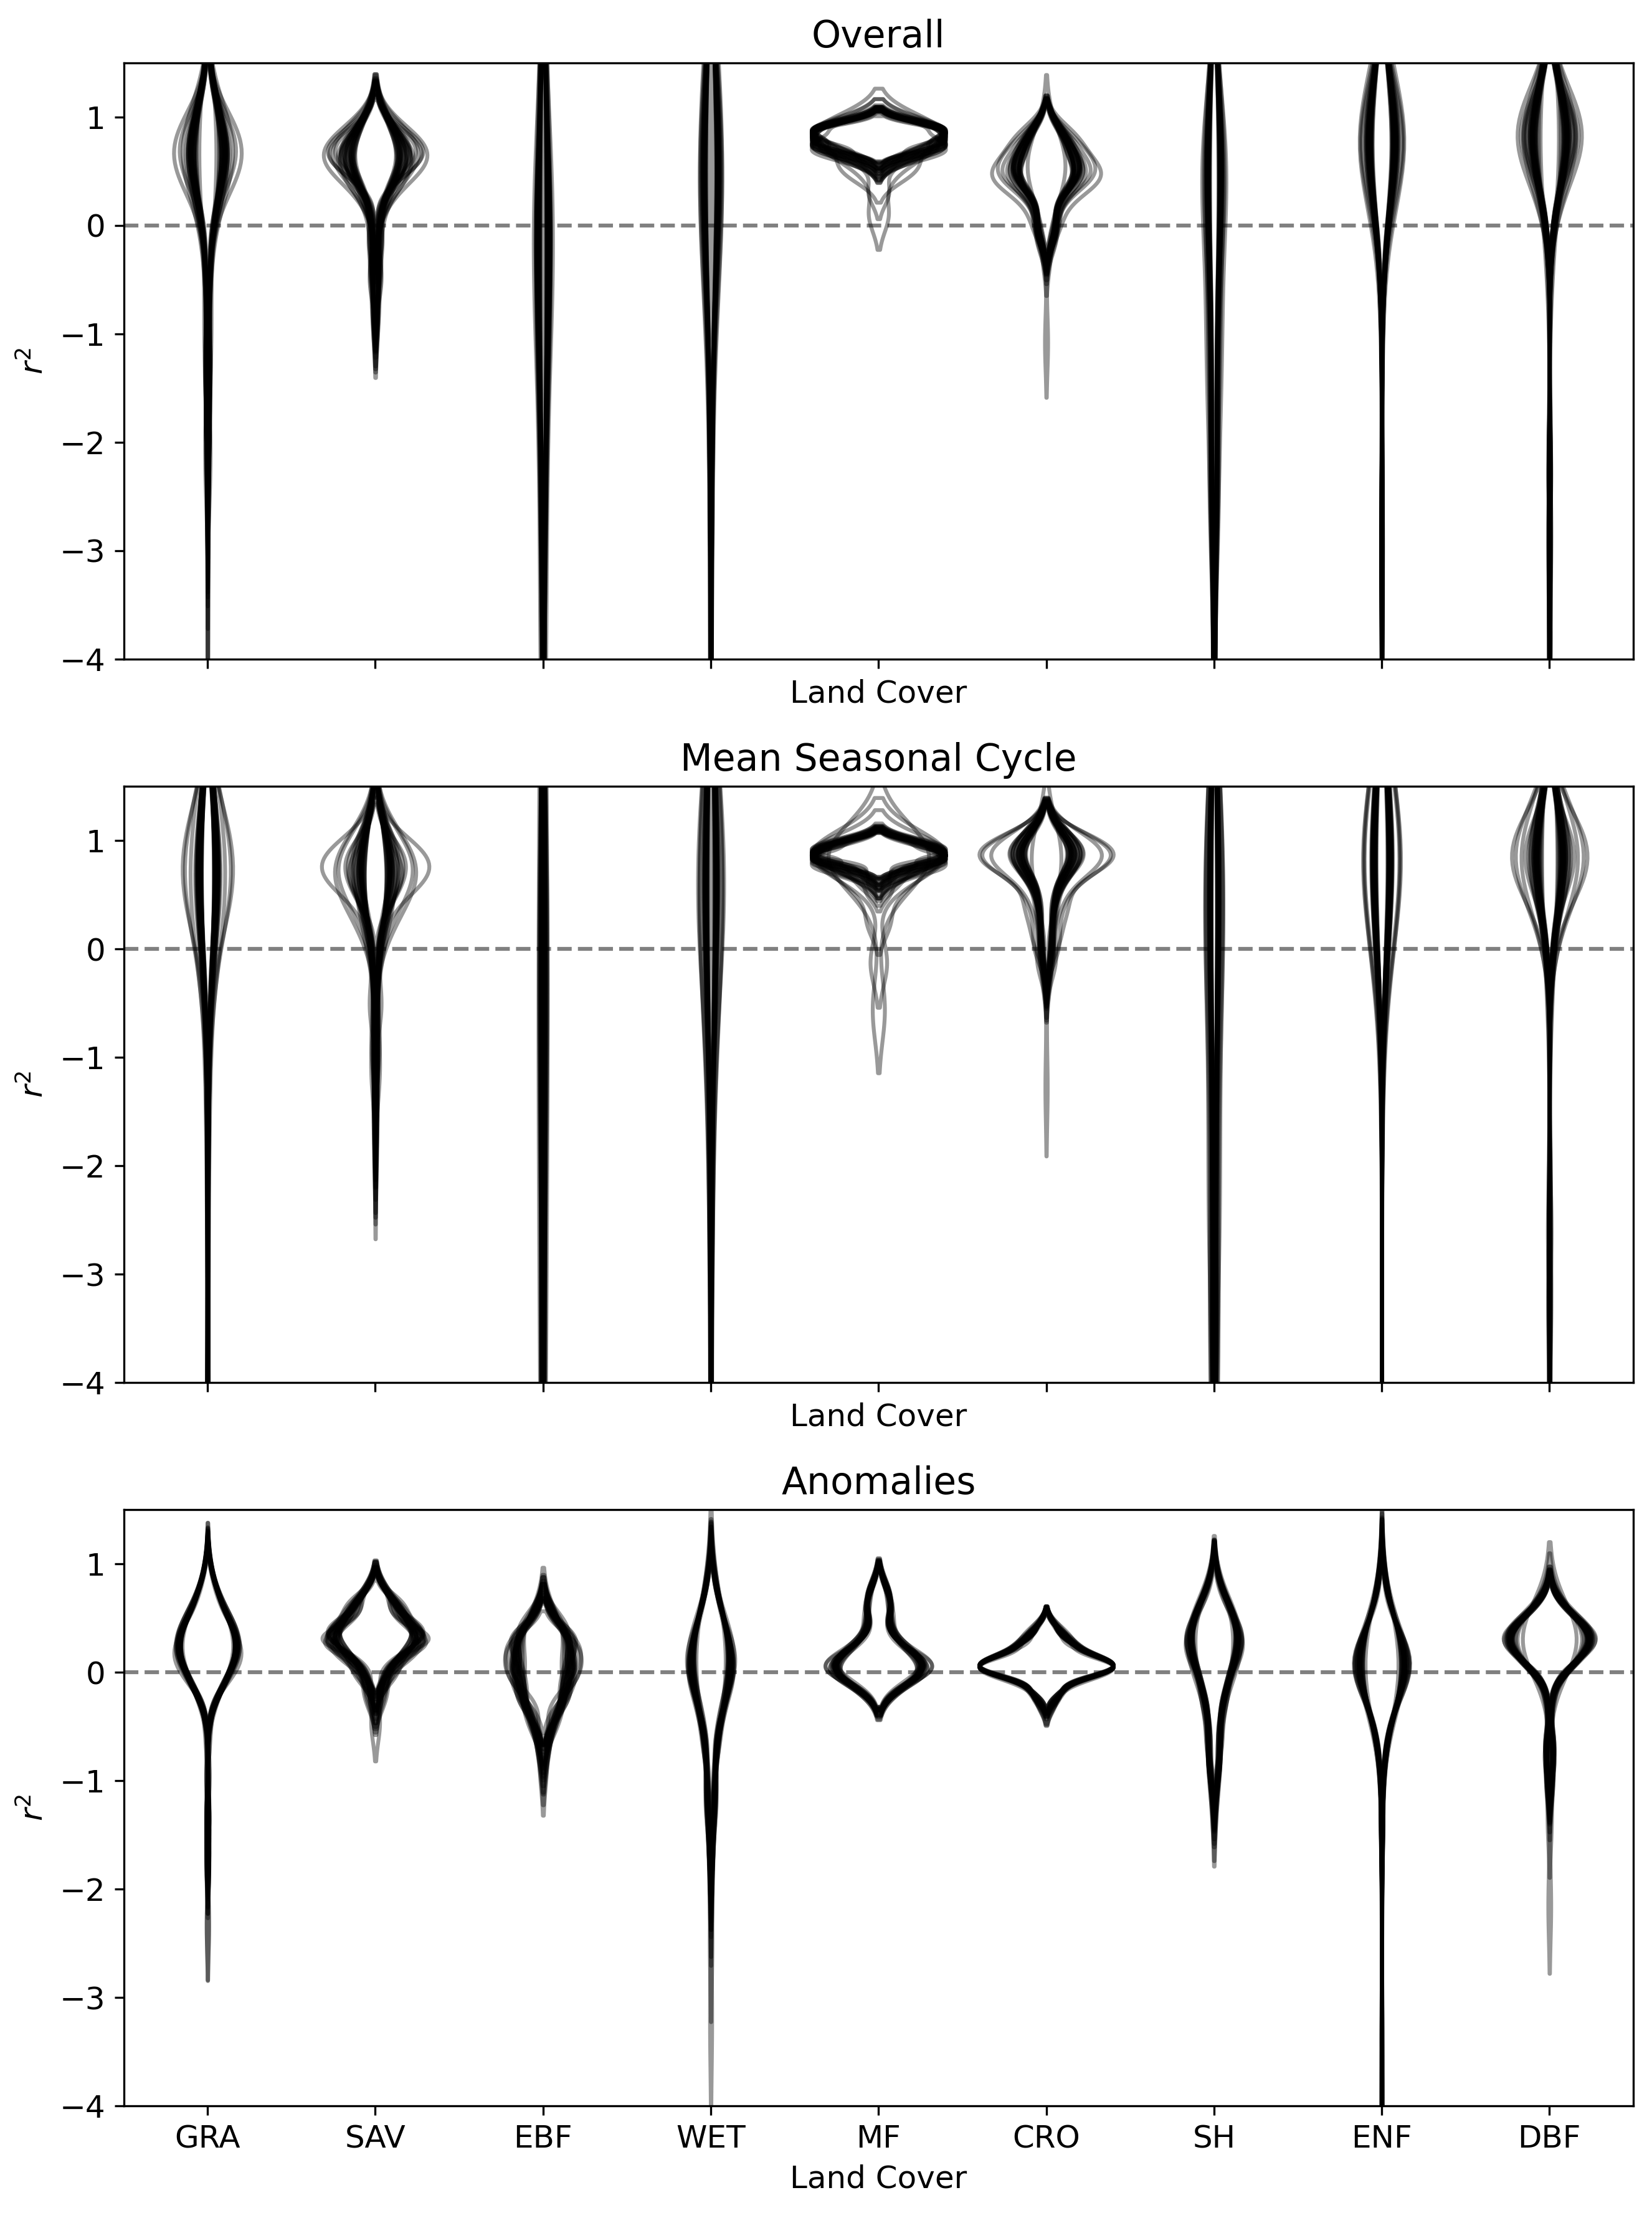

In [18]:
analysis.plt_lc_violin(lc_metrics, 'analysis/benchmark', 'Land Cover', 'exp_id')

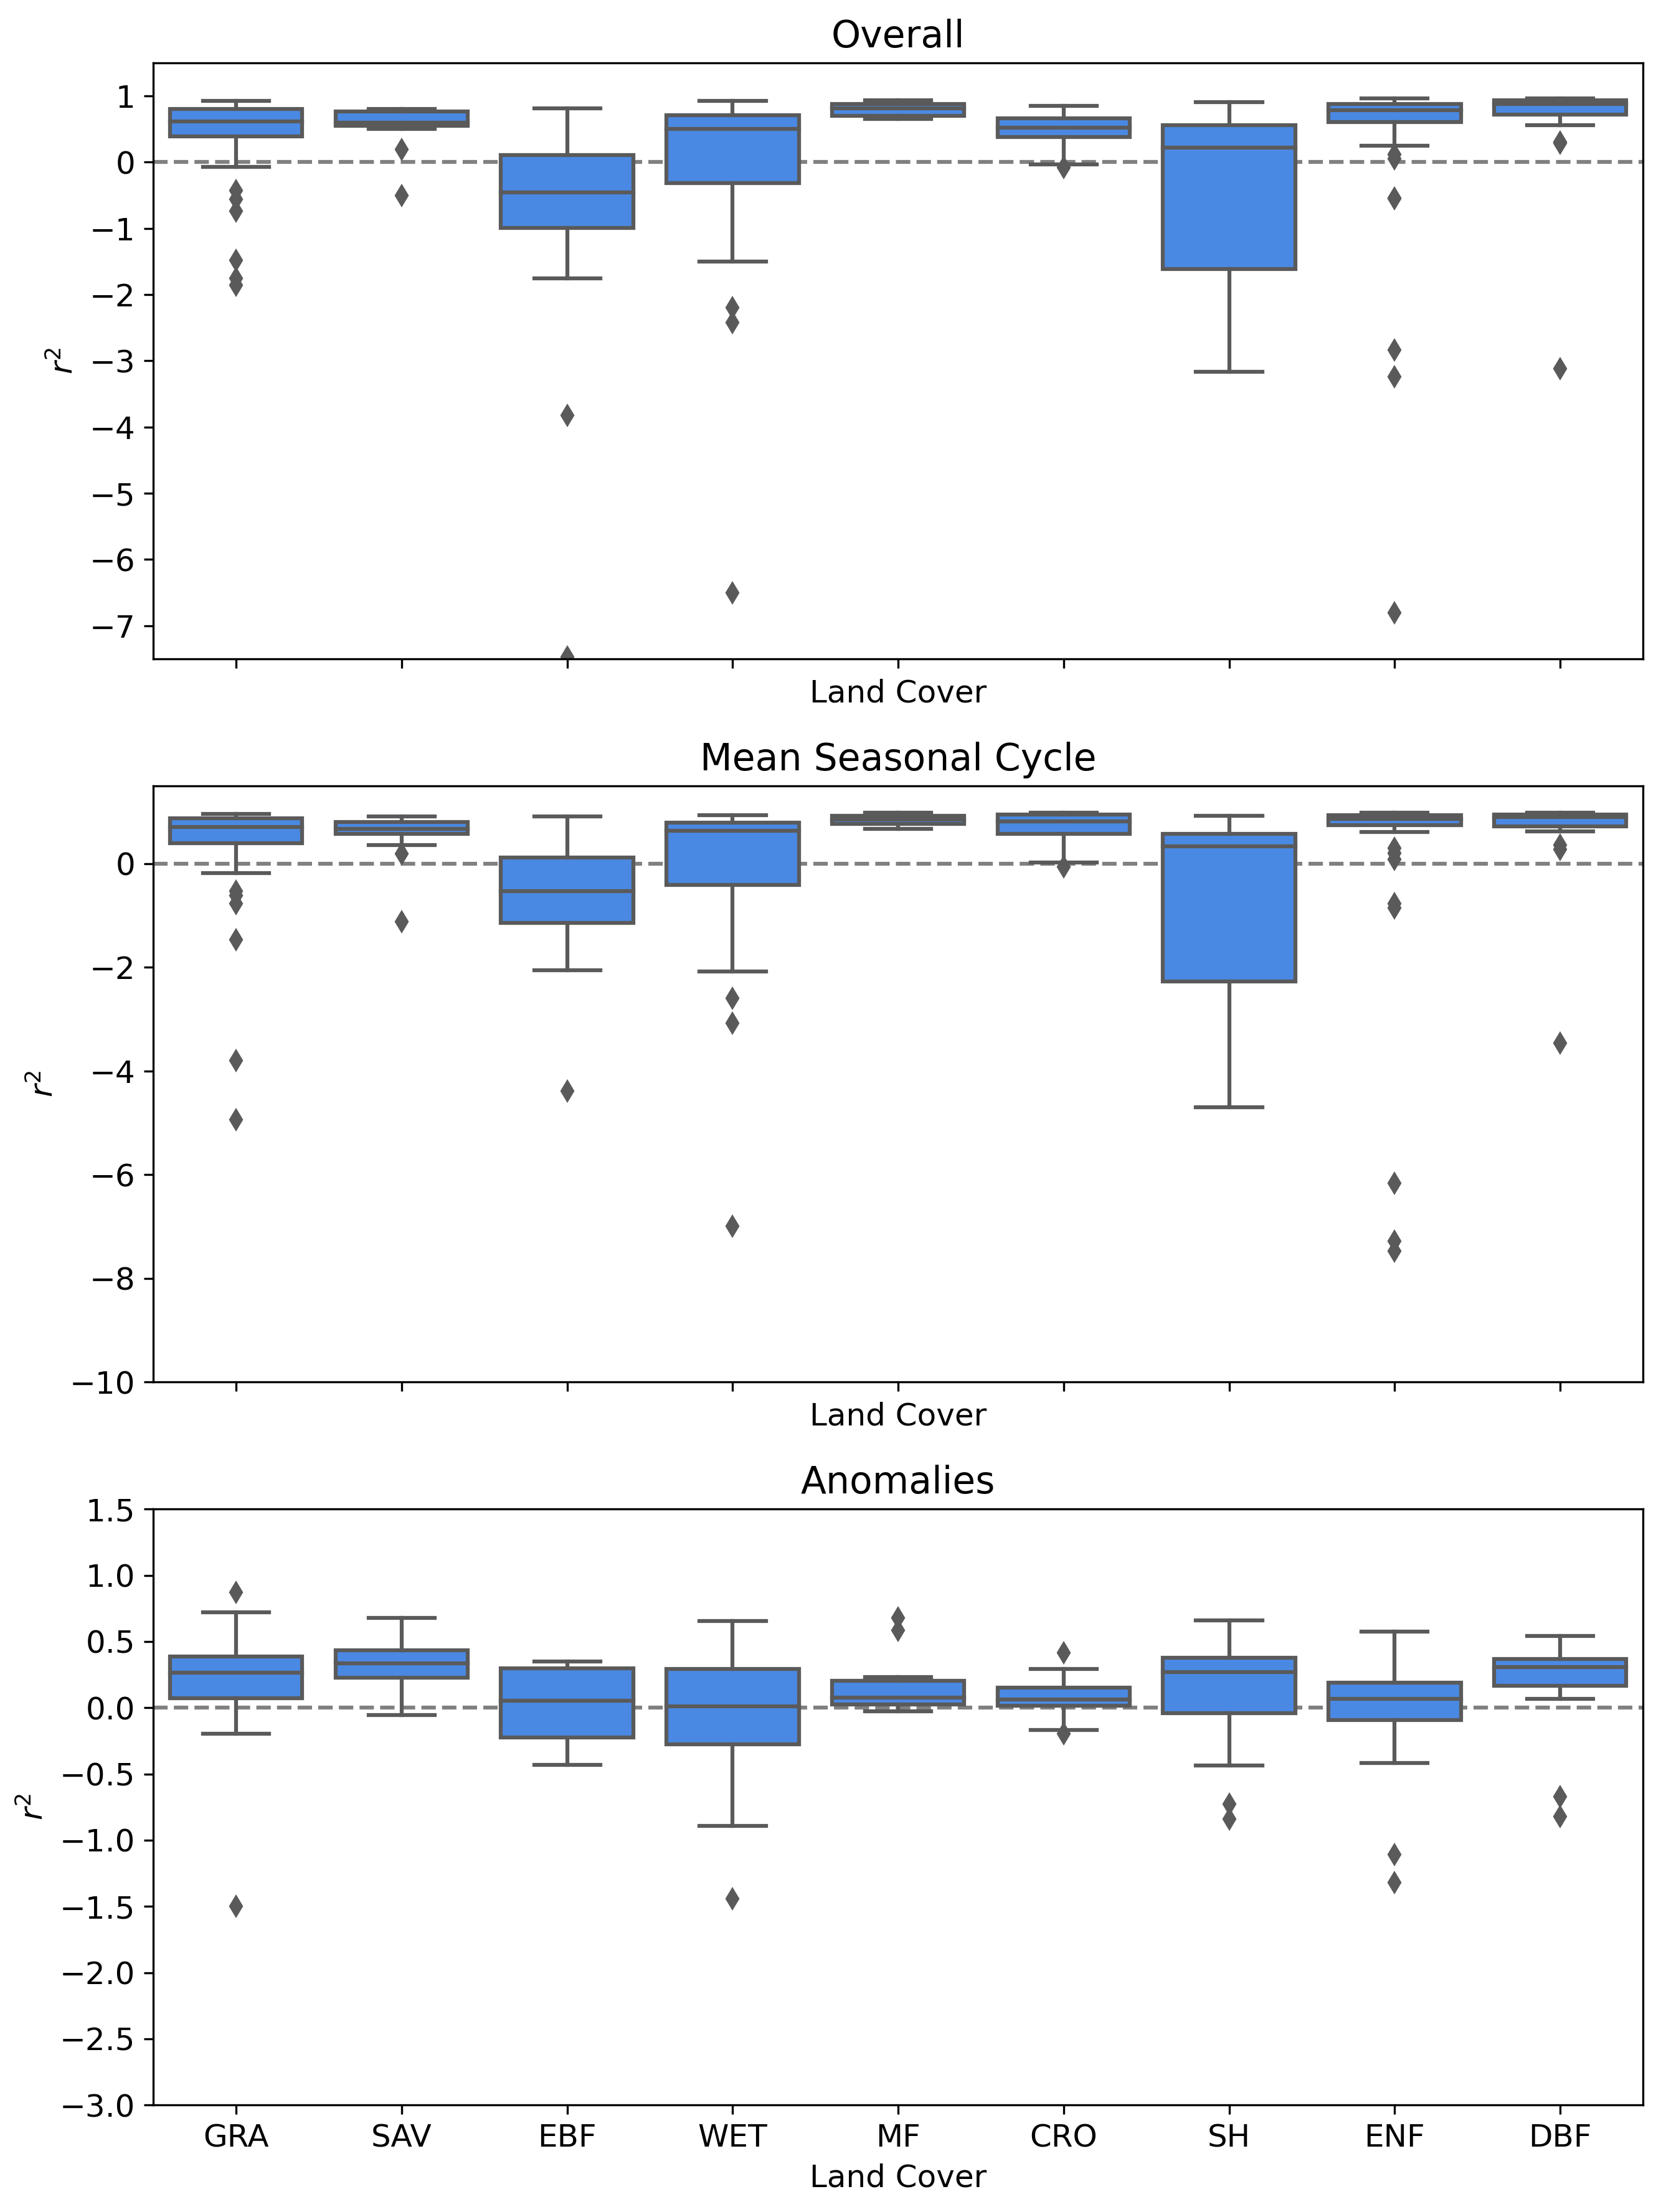

In [19]:
analysis.plt_lc_meanbox(lc_metrics, 'analysis/benchmark', 'Land Cover', 'exp_id')

In [9]:
from importlib import reload
reload(analysis)
reload(utils)

<module 'modules.utils' from '/global/scratch/users/maxgaber/gpp_upscaling/gpp/modules/utils.py'>